In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6da29224-a70f-43de-baae-e2c1e9704903',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-18T17:51:56.963Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10389}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11848, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11848,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979789e+07,1.979789e+07,False,NaN,1,NaN,NaN,None,2024-12-18T17:50:00.000Z,104673.919583,7.286452e+10,-2.5788,0.658489,-2.508005,4.143391,14.569337,53.670266,64.033741,2.072323e+12,56.6921,2.198152e+12,None,2024-12-18T17:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
1,1027,Ethereum,ETH,ethereum,9697,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204521e+08,1.204521e+08,True,NaN,2,NaN,NaN,None,2024-12-18T17:50:00.000Z,3887.624719,3.439126e+10,-15.9196,0.575694,-2.330518,2.703724,22.736500,47.149140,56.808372,4.682725e+11,12.8071,4.682725e+11,None,2024-12-18T17:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
2,52,XRP,XRP,xrp,1483,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.718787e+10,9.998686e+10,False,NaN,3,NaN,NaN,None,2024-12-18T17:51:00.000Z,2.475600,1.533934e+10,-12.4072,0.319248,-6.218880,2.962560,119.155047,357.445525,316.912250,1.415743e+11,3.8701,2.475600e+11,None,2024-12-18T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
3,825,Tether USDt,USDT,tether,109001,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.406079e+11,1.434428e+11,True,NaN,4,NaN,NaN,None,2024-12-18T17:50:00.000Z,0.999670,1.576031e+11,-4.2412,-0.006910,-0.031452,-0.107589,-0.122398,-0.031128,-0.054631,1.405615e+11,3.8443,1.433955e+11,None,2024-12-18T17:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-18 23:21:48.162603
4,5426,Solana,SOL,solana,811,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.791658e+08,5.903766e+08,True,NaN,5,NaN,NaN,None,2024-12-18T17:51:00.000Z,216.791935,5.480339e+09,-10.1381,0.234344,-4.375681,-5.287808,-9.360405,39.458676,51.162627,1.038793e+11,2.8397,1.279889e+11,None,2024-12-18T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
5,1839,BNB,BNB,bnb,2311,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440080e+08,1.440080e+08,False,NaN,6,NaN,NaN,None,2024-12-18T17:51:00.000Z,716.737603,2.412221e+09,2.5213,0.291651,-1.487975,1.843127,15.388586,20.127465,25.540926,1.032160e+11,2.8216,1.032160e+11,None,2024-12-18T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
6,74,Dogecoin,DOGE,dogecoin,1129,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.472544e+11,1.472544e+11,True,NaN,7,NaN,NaN,None,2024-12-18T17:50:00.000Z,0.386367,3.586857e+09,-3.2781,0.489313,-4.021411,-5.606135,3.704732,176.278895,263.482364,5.689416e+10,1.5560,5.689416e+10,None,2024-12-18T17:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
7,3408,USDC,USDC,usd-coin,23990,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.252278e+10,4.252278e+10,False,NaN,8,NaN,NaN,None,2024-12-18T17:50:00.000Z,0.999888,1.057141e+10,-8.6565,-0.007276,-0.007042,-0.002197,-0.025997,-0.010158,-0.004940,4.251800e+10,1.1629,4.251800e+10,None,2024-12-18T17:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-18 23:21:48.162603
8,2010,Cardano,ADA,cardano,1408,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.50

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6da29224-a70f-43de-baae-e2c1e9704903',
    }
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2=pd.json_normalize(data['data'])
    df2['timestamp']=pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r'C:\Users\samri\MLProjects\APITestResults\API.csv'):
        df.to_csv(r'C:\Users\samri\MLProjects\APITestResults\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\samri\MLProjects\APITestResults\API.csv',mode='a',header=False)

In [5]:
import os
from time import time
from time import sleep
for i in range(50):
    api_runner()
    print('API Runner completed')
    sleep(20)#sleep for 1  minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
pd.set_option('display.float_format',lambda x:'%.5f'%x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11848,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979789e+07,1.979789e+07,False,NaN,1,NaN,NaN,None,2024-12-18T17:50:00.000Z,104673.919583,7.286452e+10,-2.5788,0.658489,-2.508005,4.143391,14.569337,53.670266,64.033741,2.072323e+12,56.6921,2.198152e+12,None,2024-12-18T17:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
1,1027,Ethereum,ETH,ethereum,9697,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204521e+08,1.204521e+08,True,NaN,2,NaN,NaN,None,2024-12-18T17:50:00.000Z,3887.624719,3.439126e+10,-15.9196,0.575694,-2.330518,2.703724,22.736500,47.149140,56.808372,4.682725e+11,12.8071,4.682725e+11,None,2024-12-18T17:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
2,52,XRP,XRP,xrp,1483,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.718787e+10,9.998686e+10,False,NaN,3,NaN,NaN,None,2024-12-18T17:51:00.000Z,2.475600,1.533934e+10,-12.4072,0.319248,-6.218880,2.962560,119.155047,357.445525,316.912250,1.415743e+11,3.8701,2.475600e+11,None,2024-12-18T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
3,825,Tether USDt,USDT,tether,109001,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.406079e+11,1.434428e+11,True,NaN,4,NaN,NaN,None,2024-12-18T17:50:00.000Z,0.999670,1.576031e+11,-4.2412,-0.006910,-0.031452,-0.107589,-0.122398,-0.031128,-0.054631,1.405615e+11,3.8443,1.433955e+11,None,2024-12-18T17:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-18 23:21:48.162603
4,5426,Solana,SOL,solana,811,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.791658e+08,5.903766e+08,True,NaN,5,NaN,NaN,None,2024-12-18T17:51:00.000Z,216.791935,5.480339e+09,-10.1381,0.234344,-4.375681,-5.287808,-9.360405,39.458676,51.162627,1.038793e+11,2.8397,1.279889e+11,None,2024-12-18T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
5,1839,BNB,BNB,bnb,2311,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440080e+08,1.440080e+08,False,NaN,6,NaN,NaN,None,2024-12-18T17:51:00.000Z,716.737603,2.412221e+09,2.5213,0.291651,-1.487975,1.843127,15.388586,20.127465,25.540926,1.032160e+11,2.8216,1.032160e+11,None,2024-12-18T17:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
6,74,Dogecoin,DOGE,dogecoin,1129,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.472544e+11,1.472544e+11,True,NaN,7,NaN,NaN,None,2024-12-18T17:50:00.000Z,0.386367,3.586857e+09,-3.2781,0.489313,-4.021411,-5.606135,3.704732,176.278895,263.482364,5.689416e+10,1.5560,5.689416e+10,None,2024-12-18T17:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-18 23:21:48.162603
7,3408,USDC,USDC,usd-coin,23990,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.252278e+10,4.252278e+10,False,NaN,8,NaN,NaN,None,2024-12-18T17:50:00.000Z,0.999888,1.057141e+10,-8.6565,-0.007276,-0.007042,-0.002197,-0.025997,-0.010158,-0.004940,4.251800e+10,1.1629,4.251800e+10,None,2024-12-18T17:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-18 23:21:48.162603
8,2010,Cardano,ADA,cardano,1408,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.50

In [22]:
df3=df.groupby('name',sort=False)[['quote.USD.volume_24h','quote.USD.volume_change_24h','quote.USD.percent_change_1h',
                               'quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                               'quote.USD.percent_change_30d','quote.USD.percent_change_60d',
                               'quote.USD.percent_change_90d']].mean().reset_index()
print(df3)

           name  quote.USD.volume_24h  quote.USD.volume_change_24h  \
0       Bitcoin          7.286481e+10                     -2.57343   
1      Ethereum          3.449908e+10                    -15.57598   
2           XRP          1.534308e+10                    -12.33706   
3   Tether USDt          1.576095e+11                     -4.19914   
4        Solana          5.480937e+09                    -10.10942   
5           BNB          2.412737e+09                      2.55679   
6      Dogecoin          3.588166e+09                     -3.11508   
7          USDC          1.066818e+10                     -7.76742   
8       Cardano          1.454243e+09                     -6.92793   
9          TRON          1.317986e+09                    -40.35033   
10    Avalanche          7.260950e+08                     -4.75638   
11    Chainlink          1.412133e+09                     -9.69137   
12    Shiba Inu          7.155924e+08                     -8.13075   
13      Toncoin     

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

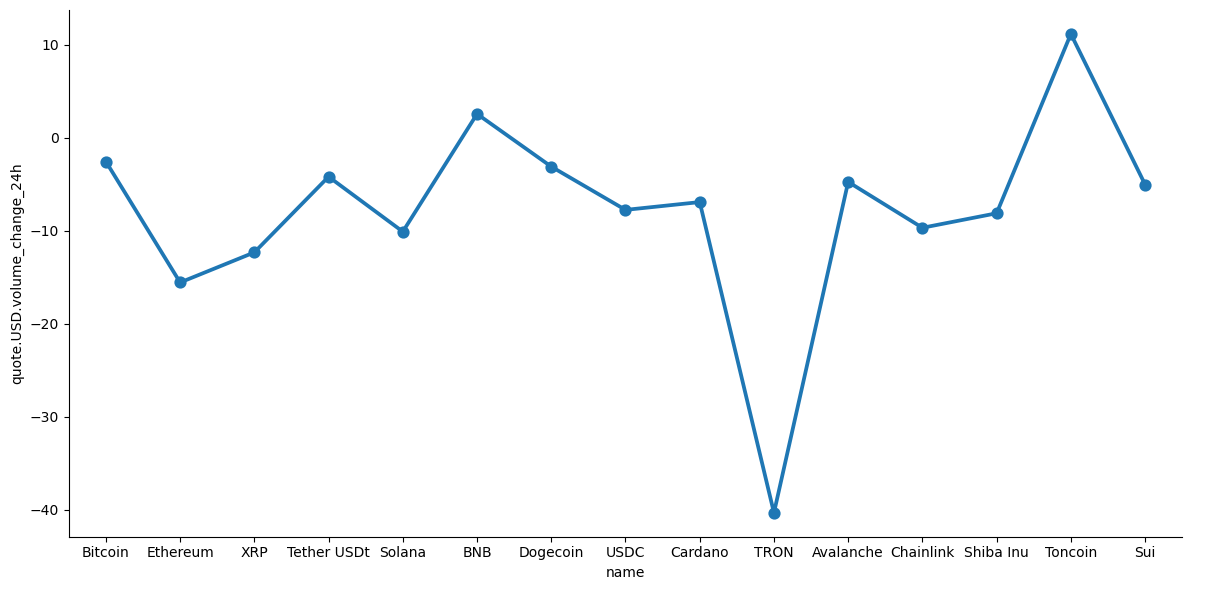

In [38]:
sns.catplot(x='name',y='quote.USD.volume_change_24h',data=df3,kind='point',height=6, aspect=2)